In [ ]:
import pandas as pd
import pykrev as pk
import numpy as np
import seaborn as sns
from sklearn import decomposition
from matplotlib import pyplot as plt
import missingno as msno
from matplotlib.lines import Line2D
import math
import time
from sklearn.cluster import KMeans




In [209]:
#read the ordination data 
ordinationData = pd.read_csv("../ordination/333_ordination.csv",index_col=0)

In [210]:
#read the metadata
metaData = pd.read_csv("../metadata/333_metadata.csv",index_col=0)

In [211]:
#create an empty dataframe to make the pca plots in
plotData = pd.DataFrame()
plotData['sample_id'] = ordinationData.index
plotData = pd.merge(plotData,metaData, how='left', left_on='sample_id', right_on='ID')

In [260]:
#filter out empty or completely full columns
N = ordinationData.shape[0]
P = 0.5 # the required proportion of data
M = int(np.floor(N * P)) #the minimum number of recorded values for a sample (round down)
U =  int(np.ceil(N * (1-P))) #the maximum number of recorded values for a sample (round up)
print(M,U,M+U,N)
boolA = (ordinationData.notnull().sum(axis=0) >= M) & (ordinationData.notnull().sum(axis=0) <= U)
filterData = ordinationData.loc[:,boolA]
C = filterData.shape[1]
columns = filterData.columns


206 207 413 413


In [252]:
#figure out how many pairwise combinations are possible 
C_combinations = math.factorial(C)/(2*math.factorial(C-2))
shuffles = C_combinations/C
#figure out how many times you need to shuffle the isnull matrix, round up 
shuffles = int(np.round(shuffles))

In [253]:
notnull = np.array(filterData.notnull(),dtype=int)
notnull_shift = np.array(filterData.notnull(),dtype=int)
exclusives = set()
tic = time.time()
for i in range (0,shuffles):
    notnull_shift = np.concatenate((notnull_shift[:, -1:], notnull_shift[:, :-1]), axis=1)
    boolB = np.max(notnull + notnull_shift,axis=0) == 1
    exclusives.update(columns[boolB])
toc = time.time()
print(toc-tic)


1.1298799514770508


In [258]:
exclusiveData = ordinationData.loc[:,list(exclusives)]

In [317]:
kmeans = KMeans(n_clusters=50)
clusters = kmeans.fit_predict(exclusiveData.notnull().transpose())


/home/ezrkit/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [318]:
exclusiveData.columns[clusters==1]

Index(['NS00010274', 'NS00056492', 'NS00001813', 'NS00039344', 'NS00049754',
       'NS00024812', 'NS00005426', 'NS00005418', 'NS00014563', 'NS00028219',
       'NS00010746', 'NS00037965', 'NS00022090', 'NS00059070', 'NS00034845'],
      dtype='object')

In [319]:
exclusiveData.columns[clusters==0]

Index(['NS00048111', 'NS00104144', 'NS00060995', 'NS00081755', 'NS00102676',
       'NS00035152', 'NS00044515'],
      dtype='object')

In [320]:

# Sort columns based on cluster membership 
sorted_indices = np.argsort(clusters)
sorted_matrix = exclusiveData.iloc[:, sorted_indices]


In [321]:
sorted_matrix

,NS00044515,NS00035152,NS00081755,NS00048111,NS00104144,NS00060995,NS00102676,NS00010746,NS00059070,NS00056492,...,NS00024165,NS00025070,NS00102326,NS00068687,NS00022541,NS00039235,NS00028244,NS00069600,NS00010591,NS00013947
19139,1.574608e+05,1.574608e+05,1.574608e+05,1.574608e+05,1.574608e+05,NaN,1.574608e+05,NaN,NaN,NaN,...,331619.631812,1.109524e+06,1.109524e+06,121344.649624,331619.631812,108915.588923,331619.631812,55017.256,868986.482667,868986.482667
19162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.904984e+05,21896.334212,6.173907e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.990045e+05,45450.781630,4.451255e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19960,8.208010e+04,4.136600e+05,8.208010e+04,8.208010e+04,8.208010e+04,214381.970791,8.208010e+04,NaN,NaN,NaN,...,96693.226378,5.876658e+05,5.876658e+05,299652.000000,96693.226378,180819.938088,96693.226378,213278.448,768431.941964,768431.941964
19999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.227956e+05,66118.374000,3.855859e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.678579e+05,107876.029333,5.180327e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,2.005579e+06,2.005579e+06,2.005579e+06,2.005579e+06,2.005579e+06,373525.549091,2.005579e+06,NaN,NaN,NaN,...,81680.000000,1.739262e+06,1.739262e+06,135532.000000,81680.000000,145504.067351,81680.000000,208956.000,287640.919059,287640.919059
21545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.034880e+06,527759.090370,7.358635e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.912077e+05,18914.187676,2.758610e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


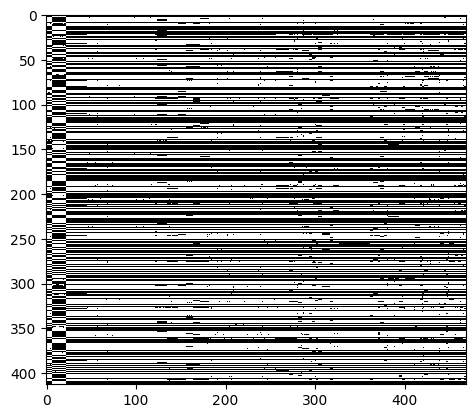

In [322]:
plt.imshow(sorted_matrix.notnull(),cmap='gray', interpolation='None')

In [ ]:
#find columns that perfectly predict eachother, we are just going to make a set of all of the columns that exhibit this behaviour
columns = filterData.columns
isnull = np.array(filterData.isna(),dtype=int)
notnull = np.array(filterData.notnull(),dtype=int)
for idx,c in enumerate(columns): 
    if c in exclusives:
        pass
    else:
        notnulli = notnull[:,idx]
        notnulli = notnulli[:, np.newaxis]
        diff = isnull - notnulli
        if len(columns[diff.sum(axis=0) == 0]) > 0:
            exclusives.update(c)
            exclusives.update(columns[diff.sum(axis=0) == 0])

KeyboardInterrupt: 

In [61]:
isnull | notnull

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [58]:
notnull

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [52]:
test

{'a', 'b', 'c', 'd'}

In [15]:

#first get rid of anything thats always false or always true
sum(boolA)

0

In [ ]:
missing = ordinationData.iloc[:, [i for i, n in enumerate(np.var(ordinationData.isnull(), axis='rows')) if n > 0]]
corr_mat = missing.isnull().corr()